### 2번 (건강 관련 변수)

- Diphtheria: 디프테리아 예방접종률
- Incidents_HIV: HIV 발생 건수
- Hepatitis_B: B형 간염 예방접종률
- Measles: 홍역 사례 수

### EDA 절차

1. 데이터 로드
- 다양한 소스에서 데이터를 로드한다. (파일, 데이터베이스, API 등에서 데이터를 불러온다.)
- 데이터가 로드된 후에는 구조를 확인하기 위해 첫 몇 줄의 데이터를 출력해 본다.
2. 데이터 구조 및 기초 통계 확인
- 데이터의 구조를 파악하기 위해 컬럼 정보와 데이터 타입을 확인한다.
- 데이터의 기본 통계 정보를 출력하여 각 변수의 분포와 특성을 살펴본다.
- df.head(), df.info(), df.describe() 등의 함수를 사용한다.
3. 결측치 및 이상치 탐색
- 결측치(NaN) 값이 존재하는지 확인하고, 이를 처리하는 방법을 결정한다.
- 데이터에 존재하는 이상치(Outlier)를 탐지하고, 이를 어떻게 처리할지 결정한다.
- df.isnull().sum(), df.boxplot() 등의 함수를 활용한다.
4. 데이터 시각화를 통한 탐색
- 데이터를 시각화하여 변수 간의 관계, 분포 등을 파악한다.
- 히스토그램, 박스플롯, 상관관계 행렬 등 다양한 그래프를 통해 데이터의 특성을 시각적으로 확인한다.
- sns.countplot(), sns.heatmap() 등의 함수를 사용한다.
5. 데이터 정제 및 전처리
- 필요 없는 변수나 중복 데이터를 제거한다.
- 범주형 데이터를 처리하거나, 스케일링 및 정규화를 통해 모델에 적합한 형태로 데이터를 변환한다.
- df.drop(), df.fillna(), pd.get_dummies() 등의 함수를 활용한다.
6. 데이터 변환 및 피처 엔지니어링
- 새로운 피처를 생성하거나 기존 피처를 변환하여 분석에 적합한 형태로 데이터를 조정한다.
- 로그 변환, 다항식 피처 추가 등 다양한 기법을 통해 데이터를 변환할 수 있다.
- np.log(), PolynomialFeatures() 등의 함수를 활용한다.
7. 데이터 분할
- 학습용과 테스트용 데이터로 분할한다.
- 이 과정은 모델을 평가하고 성능을 검증하는 데 중요한 단계이다.
- train_test_split() 함수를 사용한다.

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 1. 데이터 로드

df = pd.read_csv('./data/Life-Expectancy-Data-Averaged.csv')

print(df.head()) # year 데이터 변화 없음 


               Country                         Region    Year  Infant_deaths  \
0          Afghanistan                           Asia  2007.5       71.08125   
1              Albania                 Rest of Europe  2007.5       15.25625   
2              Algeria                         Africa  2007.5       26.75625   
3               Angola                         Africa  2007.5       88.76875   
4  Antigua and Barbuda  Central America and Caribbean  2007.5        9.47500   

   Under_five_deaths  Adult_mortality  Alcohol_consumption  Hepatitis_B  \
0           98.61250       265.804969             0.016125      64.5625   
1           17.14375        83.132969             4.696875      98.0000   
2           31.19375       113.439281             0.400625      88.3125   
3          144.16250       297.844063             4.935625      68.8125   
4           11.51875       142.478813             7.755000      98.2500   

   Measles       BMI    Polio  Diphtheria  Incidents_HIV  GDP_per_ca

In [9]:
# 결측치 및 이상치 탐색
print(df.info()) # 결측치 없음 대부분 float 타입 
print(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      179 non-null    object 
 1   Region                       179 non-null    object 
 2   Year                         179 non-null    float64
 3   Infant_deaths                179 non-null    float64
 4   Under_five_deaths            179 non-null    float64
 5   Adult_mortality              179 non-null    float64
 6   Alcohol_consumption          179 non-null    float64
 7   Hepatitis_B                  179 non-null    float64
 8   Measles                      179 non-null    float64
 9   BMI                          179 non-null    float64
 10  Polio                        179 non-null    float64
 11  Diphtheria                   179 non-null    float64
 12  Incidents_HIV                179 non-null    float64
 13  GDP_per_capita      

##### 2-1 데이터 컬럼 정리


**1. 부동소수점형 컬럼 (float64)**
- `Year`: 연도
- `Infant_deaths`: 영아 사망 수
- `Under_five_deaths`: 5세 이하 사망 수
- `Adult_mortality`: 성인 사망률
- `Alcohol_consumption`: 1인당 알코올 소비량
- `Hepatitis_B`: B형 간염 예방접종률
- `Measles`: 홍역 사례 수
- `BMI`: 평균 BMI(체질량지수)
- `Polio`: 소아마비 예방접종률
- `Diphtheria`: 디프테리아 예방접종률
- `Incidents_HIV`: HIV 발생 건수
- `GDP_per_capita`: 1인당 GDP
- `Population_mln`: 인구(백만 명 단위)
- `Thinness_ten_nineteen_years`: 10-19세의 저체중 비율
- `Thinness_five_nine_years`: 5-9세의 저체중 비율
- `Schooling`: 평균 교육 연수
- `Life_expectancy`: 기대수명

**2. 객체형 컬럼 (object)**
- `Country`: 국가명
- `Region`: 지역명

### 3. 전처리

##### 3-1 결측값 확인

In [10]:
print(df.isnull().sum())

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status                 0
Life_expectancy                0
dtype: int64


* 결측값이 없는 완벽한 데이터

##### 3-2 이상치 확인

* 숫자형은 boxplot을 통해 사분위수를 기준으로 이상값을 확인
* 범주형은 value_counts를 통해 카테고리의 빈도를 확인하여 특정 카테고리의 빈도가 비정상적으로 높거나 낮지 않은지 확인

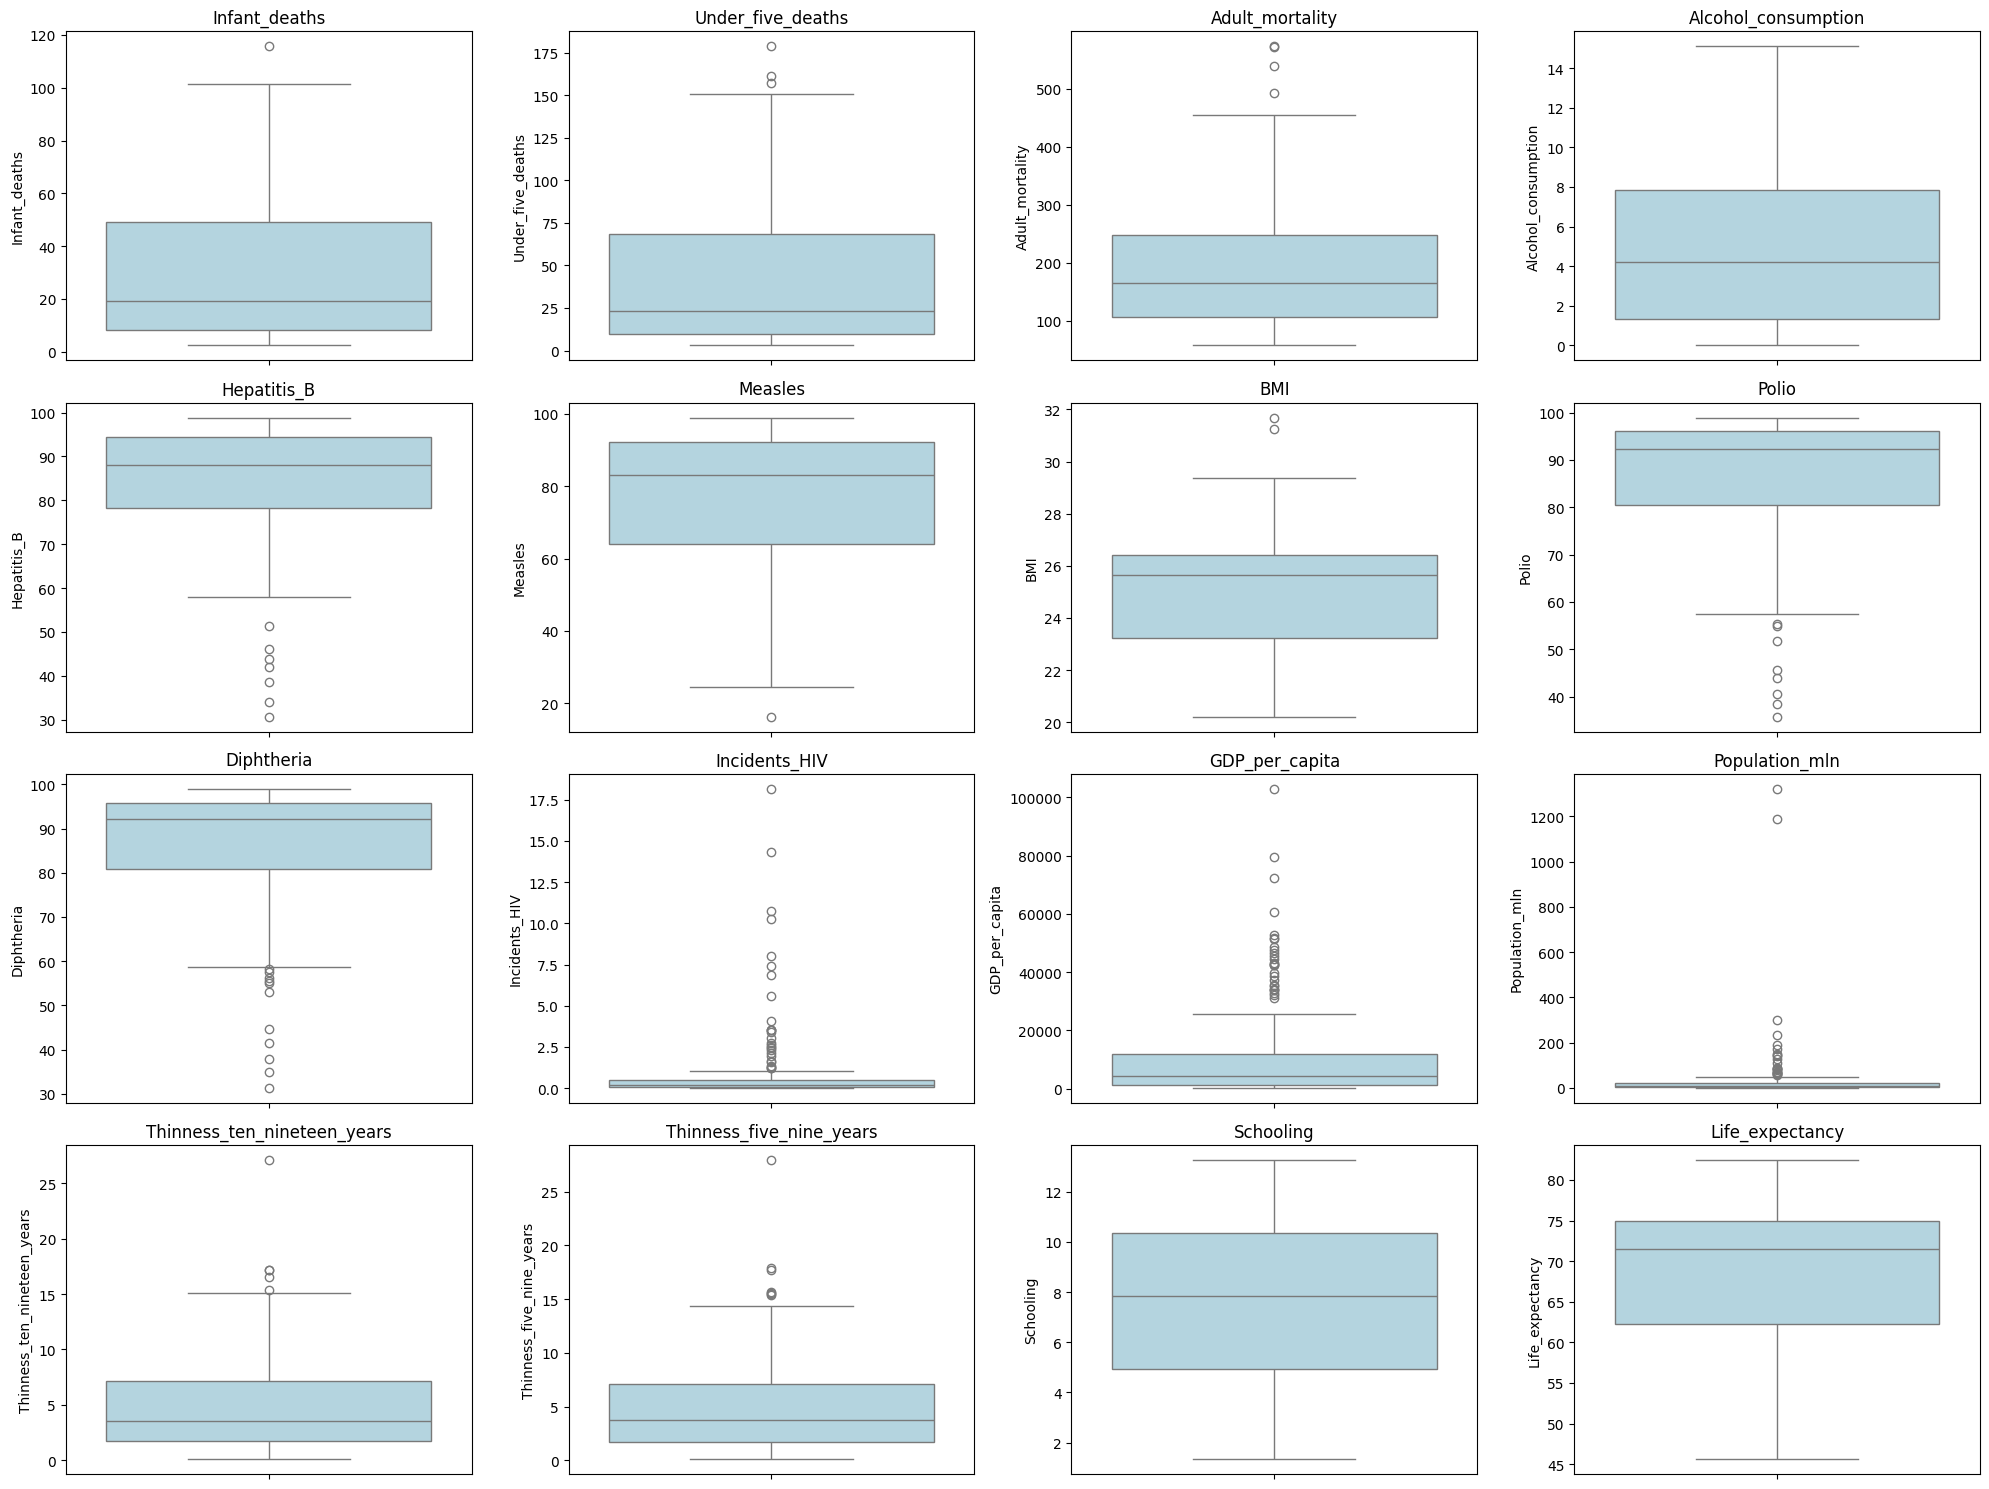

In [11]:
columns = [
    'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 
    'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 
    'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 
    'Population_mln', 'Thinness_ten_nineteen_years', 
    'Thinness_five_nine_years', 'Schooling', 'Life_expectancy'
]

# 박스플롯 그리기
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(data=df, y=column, color="lightblue")
    plt.title(column)
    plt.tight_layout()

plt.show()

* 수치형 변수의 경우 `Alcohol_consumption`, `Schooling`, `Life_expectancy` 컬럼을 제외하고 모두 사분위수 기준으로 판단했을 때 이상값이 존재한다.
* 하지만 아직 변수별 특성을 모르기 때문에 사분위수만으로 이상치를 판단하여 제거하기에는 무리가 있을 것 이라 판단하였다. 
* 따라서 컬럼별로 분석해보며 이상값에 대해 자세히 들여다 보려고 한다.

In [12]:
columns = ['Country', 'Region', 'Year']


def display_value_counts(columns, dtype):
    for column in columns:
        print(f"Value counts for {column} ({dtype}):\n")
        print(df[column].value_counts())  
        print("-" * 50)

print("=== Object형 Columns ===")
display_value_counts(columns, "Object")

=== Object형 Columns ===
Value counts for Country (Object):

Country
Afghanistan            1
Albania                1
Algeria                1
Angola                 1
Antigua and Barbuda    1
                      ..
Venezuela, RB          1
Vietnam                1
Yemen, Rep.            1
Zambia                 1
Zimbabwe               1
Name: count, Length: 179, dtype: int64
--------------------------------------------------
Value counts for Region (Object):

Region
Africa                           51
Asia                             27
European Union                   27
Central America and Caribbean    19
Rest of Europe                   15
Middle East                      14
South America                    12
Oceania                          11
North America                     3
Name: count, dtype: int64
--------------------------------------------------
Value counts for Year (Object):

Year
2007.5    179
Name: count, dtype: int64
----------------------------------------------

In [15]:
df['Country'].value_counts().unique()

1

* `country`컬럼의 경우 모든 나라가 1개만 들어가 있어야 하는데, 확인 결과 1개씩만 들어가 있어서 이상값이 없다고 판단하였다.
* `Region`은 각 대륙별 나라 갯수를 나타내고 있는데 2007년도 기준 대륙별 국가 수와 일치하기에 이상치가 없다고 판단하였다.
* `year` 컬럼의 경우 2007.5로 고정되어있기 때문에 eda에서 연도에 따른 유의미한 인사이트를 도출할 수는 없다고 판단해서 eda시 제외하였다.

In [16]:
print(df[['Diphtheria', 'Incidents_HIV', 'Hepatitis_B', 'Measles']].describe())

       Diphtheria  Incidents_HIV  Hepatitis_B     Measles
count  179.000000     179.000000   179.000000  179.000000
mean    86.271648       0.894288    84.292598   77.344972
std     13.931532       2.311895    13.820223   17.315208
min     31.312500       0.010000    30.687500   16.250000
25%     80.812500       0.080000    78.218750   64.000000
50%     92.062500       0.164375    88.000000   83.000000
75%     95.781250       0.516250    94.375000   92.250000
max     99.000000      18.164375    98.875000   99.000000


In [19]:
# 이상치 탐지를 위한 IQR 방법 (Life_expectancy 기준)

core_colums = ['Diphtheria', 'Incidents_HIV', 'Hepatitis_B', 'Measles', 'Life_expectancy']
# - Diphtheria: 디프테리아 예방접종률
# - Incidents_HIV: HIV 발생 건수
# - Hepatitis_B: B형 간염 예방접종률
# - Measles: 홍역 사례 수

for col in core_colums:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 범위 외의 데이터 확인
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{col}: {outliers}')

Diphtheria:                       Country                         Region    Year  \
0                 Afghanistan                           Asia  2007.5   
3                      Angola                         Africa  2007.5   
31   Central African Republic                         Africa  2007.5   
32                       Chad                         Africa  2007.5   
51          Equatorial Guinea                         Africa  2007.5   
55                   Ethiopia                         Africa  2007.5   
67                     Guinea                         Africa  2007.5   
70                      Haiti  Central America and Caribbean  2007.5   
118                     Niger                         Africa  2007.5   
119                   Nigeria                         Africa  2007.5   
146                   Somalia                         Africa  2007.5   

     Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0         71.08125           98.61250       

###
* 이상치 밖의 값은 없는 것을 확인함

5. 데이터 시각화를 통한 탐색

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\1855965092.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Life_expectancy'], kde=True, color='purple', palette='viridis')


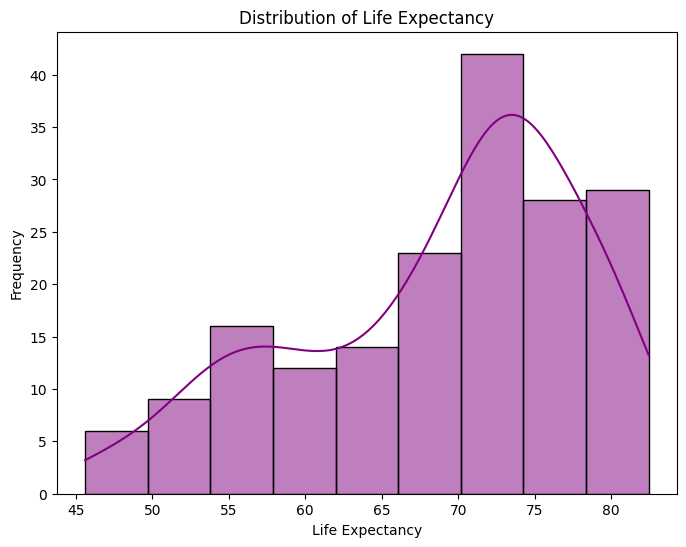

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\1855965092.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Diphtheria'], kde=True, color='green', label='Diphtheria', palette='viridis')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\1855965092.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Incidents_HIV'], kde=True, color='blue', label='Incidents_HIV', palette='viridis')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\1855965092.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Hepatitis_B'], kde=True, color='orange', label='Hepatitis_B', palette='viridis')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\1855965092.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Measles'], kde=True, color='red', label='Measles', palette='viridis')


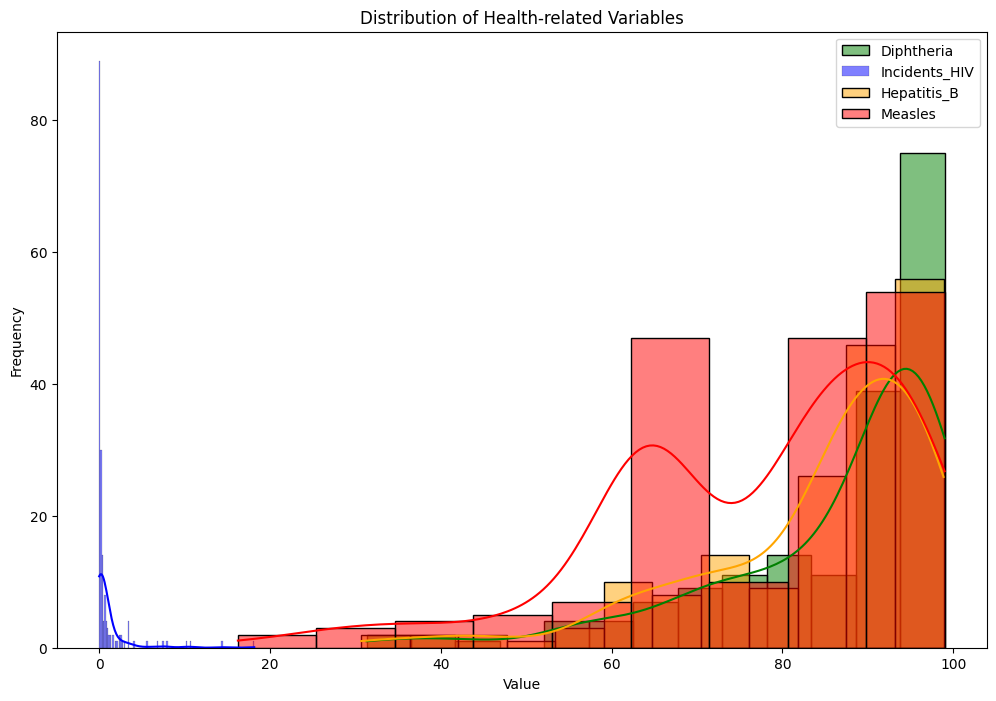

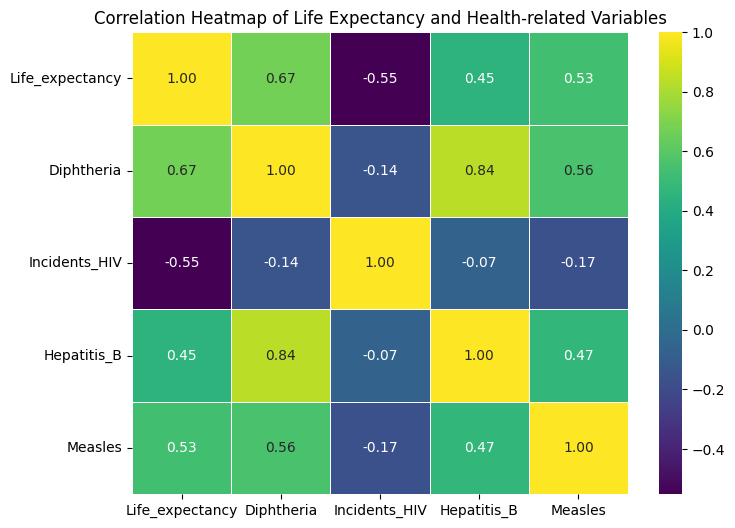

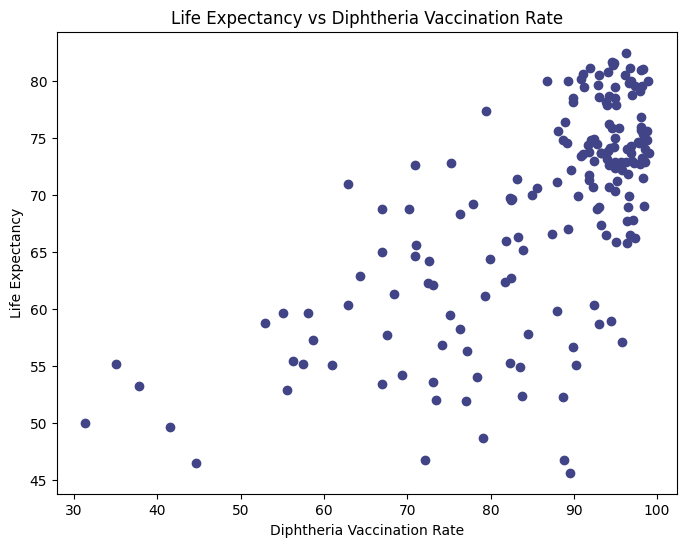

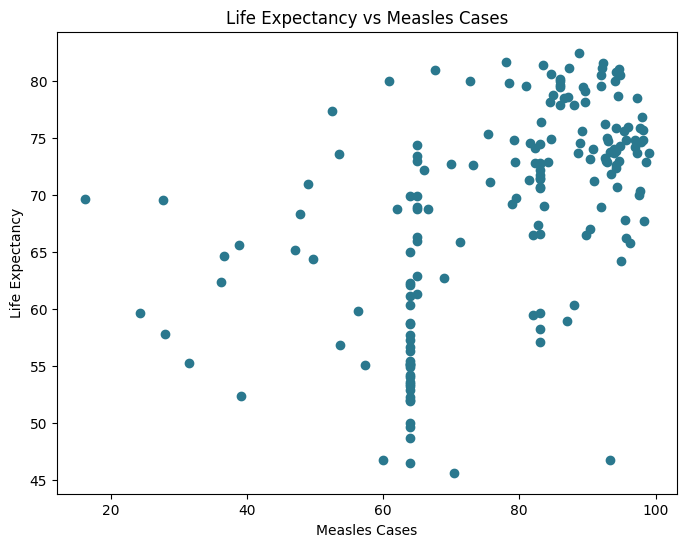

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\1855965092.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Hepatitis_B'], y=df['Life_expectancy'], palette='viridis')


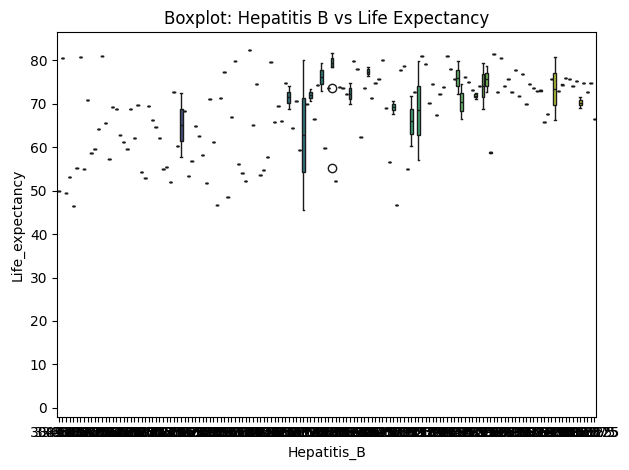


Correlation between Life Expectancy and other diseases:
Diphtheria: 0.67
Incidents_HIV: -0.55
Hepatitis_B: 0.45
Measles: 0.53


In [55]:
# 5. 데이터 시각화를 통한 탐색
# 5.1 Life Expectancy 분포 (히스토그램 + KDE)

plt.figure(figsize=(8, 6))
plt.title("Distribution of Life Expectancy")
sns.histplot(df['Life_expectancy'], kde=True, color='purple', palette='viridis')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

# 5.2 건강 관련 변수들의 분포 (히스토그램 + KDE)

plt.figure(figsize=(12, 8))
sns.histplot(df['Diphtheria'], kde=True, color='green', label='Diphtheria', palette='viridis')
sns.histplot(df['Incidents_HIV'], kde=True, color='blue', label='Incidents_HIV', palette='viridis')
sns.histplot(df['Hepatitis_B'], kde=True, color='orange', label='Hepatitis_B', palette='viridis')
sns.histplot(df['Measles'], kde=True, color='red', label='Measles', palette='viridis')
plt.legend()
plt.title("Distribution of Health-related Variables")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 5.3 변수들 간의 상관관계 (Heatmap)

plt.figure(figsize=(8, 6))
corr = df[['Life_expectancy', 'Diphtheria', 'Incidents_HIV', 'Hepatitis_B', 'Measles']].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Life Expectancy and Health-related Variables")
plt.show()

#5.4 변수 간의 관계 (산점도)

plt.figure(figsize=(8, 6))
plt.title("Life Expectancy vs Diphtheria Vaccination Rate")
plt.xlabel('Diphtheria Vaccination Rate')
plt.ylabel('Life Expectancy')
plt.scatter(df['Diphtheria'], df['Life_expectancy'], color=plt.cm.viridis(0.2))  # 0.2로 색상 값 설정
plt.show()

#5.5 Measles와 Life Expectancy의 관계 (산점도)

plt.figure(figsize=(8, 6))
plt.title("Life Expectancy vs Measles Cases")
plt.xlabel('Measles Cases')
plt.ylabel('Life Expectancy')
plt.scatter(df['Measles'], df['Life_expectancy'], color=plt.cm.viridis(0.4))  # 0.4로 색상 값 설정
plt.show()

df_numeric = df[['Diphtheria', 'Incidents_HIV', 'Hepatitis_B', 'Measles', 'Life_expectancy'] ]#df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_numeric.corr()
# 박스플롯 (Boxplot) - 기대 수명과 Hepatitis_B의 관계
plt.plot(2, 2, 4)
sns.boxplot(x=df['Hepatitis_B'], y=df['Life_expectancy'], palette='viridis')
plt.title('Boxplot: Hepatitis B vs Life Expectancy')

# 그래프 표시
plt.tight_layout()
plt.show()

# 기대 수명과 다른 변수 간의 상관관계 출력
print("\nCorrelation between Life Expectancy and other diseases:")
for disease in ['Diphtheria', 'Incidents_HIV', 'Hepatitis_B', 'Measles']:
    print(f'{disease}: {correlation_matrix["Life_expectancy"][disease]:.2f}')

1. 디프테리아(Diphtheria)와 기대 수명 (상관계수: 0.67)
디프테리아 발생률과 기대 수명은 양의 상관관계를 보인다. 디프테리아는 예방접종을 통해 예방할 수 있는 질병이다. 따라서 디프테리아의 발생률이 낮을수록 해당 지역의 보건 상황이 양호하고, 결과적으로 기대 수명이 높다는 결과를 나타낸다. 이는 디프테리아의 발생률을 감소시키기 위한 예방접종 프로그램의 중요성을 시사한다.

2. HIV 발생률(Incidents_HIV)과 기대 수명 (상관계수: -0.55)
HIV 발생률과 기대 수명은 음의 상관관계를 보인다. HIV는 면역 체계를 약화시켜 다양한 합병증을 유발하며, 치료가 이루어지지 않으면 사망에 이를 수 있다. HIV 발생률이 높은 지역에서는 기대 수명이 낮은 경향이 나타난다. 이는 HIV 예방 및 치료에 대한 접근성이 기대 수명에 중요한 영향을 미친다는 사실을 의미한다.

3. B형 간염 백신 접종률(Hepatitis_B)과 기대 수명 (상관계수: 0.45)
B형 간염 백신 접종률과 기대 수명 사이에는 양의 상관관계가 존재한다. B형 간염은 간 질환을 유발할 수 있는 위험한 질병으로, 예방접종을 통해 예방할 수 있다. 따라서 B형 간염 백신 접종률이 높은 지역에서는 간 질환으로 인한 사망률이 낮고, 그로 인해 기대 수명이 높다는 경향을 나타낸다. 이는 백신 접종을 통한 예방적 보건 관리의 중요성을 강조한다.

4. 홍역 발생률(Measles)과 기대 수명 (상관계수: 0.53)
홍역 발생률과 기대 수명은 양의 상관관계를 보인다. 홍역 역시 예방 접종으로 예방할 수 있는 질병이다. 홍역 발생률이 낮은 지역에서는 해당 질병으로 인한 사망률이 적고, 그 결과 기대 수명이 높다는 경향을 나타낸다. 이는 홍역 예방을 위한 보건 정책과 백신 접종이 기대 수명에 중요한 영향을 미친다는 사실을 의미한다.

종합적 인사이트
본 분석을 통해 다음과 같은 중요한 인사이트를 도출할 수 있다.

백신 접종이 기대 수명에 중요한 영향을 미친다. 디프테리아, B형 간염, 홍역 등의 예방접종이 이루어진 지역에서는 기대 수명이 높고, 이러한 질병의 발생률이 낮은 것이 기대 수명 향상에 기여하고 있음을 알 수 있다. 이는 공공 보건 정책에서 백신 접종을 강화해야 한다는 점을 시사한다.

HIV 발생률과 기대 수명은 음의 상관관계를 보인다. HIV 발생률이 높은 지역에서는 기대 수명이 낮아지며, 이는 HIV에 대한 예방 및 치료 접근성 향상이 중요하다는 점을 시사한다.

공공 보건 정책의 중요성이 강조된다. 디프테리아, B형 간염, 홍역과 같은 예방 가능한 질병의 발생률을 줄이기 위한 예방접종과, HIV와 같은 질병에 대한 적극적인 치료와 예방 대책이 기대 수명 향상에 기여할 수 있다는 사실을 확인할 수 있었다.

In [38]:
# 행과 열 생략 제한 해제
pd.set_option('display.max_rows', None)  # 최대 출력 행 개수
pd.set_option('display.max_columns', None)  # 최대 출력 열 개수
pd.set_option('display.width', None)  # 가로 폭 제한 제거
pd.set_option('display.max_colwidth', None)  # 열 너비 제한 제거

In [43]:
df[['Diphtheria', 'Incidents_HIV', 'Hepatitis_B', 'Measles', 'Life_expectancy']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
Diphtheria,55.12500,98.062500,91.875000,55.56250,98.3125,92.375000,92.437500,91.937500,86.7500,82.312500,95.750000,98.0625,92.7500,89.937500,95.0000,97.3125,95.187500,76.37500,93.87500,87.375000,88.06250,95.812500,97.937500,96.8125,94.0000,82.375000,90.250000,94.187500,79.937500,78.43750,91.0625,44.68750,31.312500,93.875000,93.3125,88.750000,79.31250,61.000000,67.625000,89.87500,73.43750,95.37500,93.937500,98.000000,98.12500,93.062500,75.12500,83.18750,89.187500,96.6875,92.250000,35.000000,92.37500,94.12500,88.812500,52.93750,96.75000,98.25,98.0625,62.937500,93.000000,88.00000,94.93750,87.9375,96.625000,95.6250,85.56250,57.437500,73.125000,93.25000,58.12500,95.62500,99.00000,94.81250,71.000000,76.312500,98.375000,70.25000,91.187500,94.06250,94.7500,94.37500,96.25000,97.0000,96.43750,84.5625,83.9375,98.50000,96.562500,64.312500,95.000000,79.5000,89.562500,58.68750,96.500000,94.250000,98.9375,72.5000,88.687500,96.437500,97.8750,67.000000,89.31250,73.062500,96.31250,95.000000,81.87500,93.062500,97.3750,92.06250,97.18750,77.00000,82.50000,83.5000,83.25000,96.812500,90.875000,91.875000,56.250000,41.56250,94.875,93.00000,98.75000,70.87500,89.0000,68.375000,89.62500,91.12500,82.500000,98.7500,97.00000,94.1875,95.000000,97.125,94.437500,62.9375,95.125000,96.87500,81.687500,93.312500,98.5000,72.1250,96.187500,98.625000,95.000000,90.5625,37.75000,74.125000,96.750000,98.43750,92.8125,98.31250,82.562500,98.31250,94.562500,70.93750,89.2500,89.875000,98.187500,67.00000,77.12500,84.93750,91.81250,97.687500,90.87500,96.3750,69.3750,77.8750,94.62500,92.8750,95.125000,94.187500,98.43750,66.9375,75.25000,91.750000,72.6250,83.812500,79.12500
Incidents_HIV,0.02250,0.025625,0.021875,1.30375,0.1250,0.145625,0.080625,0.046875,0.0800,0.124375,0.586875,0.0500,0.0100,0.458125,0.1675,0.0800,0.816875,0.66375,0.18125,0.188125,0.08000,10.723125,0.246875,0.1000,0.0250,0.470625,0.746875,0.308125,0.300625,2.43375,0.1000,2.50250,0.826875,0.164375,0.1000,0.211875,0.01750,0.673125,2.156875,0.16250,1.96375,0.01875,0.144375,0.046875,0.08000,0.039375,0.85625,0.65000,0.179375,0.1300,0.273125,4.064375,0.33375,0.08000,18.164375,0.56125,0.06750,0.08,0.1050,2.321875,1.330625,0.09125,0.06125,1.1900,0.064375,0.4000,0.18000,1.020625,2.608125,0.76000,1.03125,0.18000,0.08000,0.03875,0.145625,0.181875,0.101875,0.13000,0.061875,0.08000,0.0825,0.67750,0.17000,0.1300,0.08875,2.7075,0.1700,0.13000,0.116875,0.155625,0.211875,0.0300,14.345625,3.50000,0.076875,0.075625,0.0850,0.1100,5.590625,0.195625,0.1700,0.663125,0.08000,0.289375,1.01875,0.155625,0.17000,0.365625,0.0175,0.02625,0.05000,3.50000,0.40875,7.4325,0.17000,0.056875,0.031875,0.125625,0.203125,0.91375,0.080,0.03250,0.05000,0.13000,0.4000,0.475625,0.15875,0.16500,0.036875,0.0800,0.17250,0.0500,0.043125,0.080,1.621875,0.1700,0.556875,0.13000,0.355625,0.015625,3.5000,1.2400,0.120625,0.010625,0.023125,0.1700,0.13000,10.239375,0.091875,0.01625,0.4000,0.40000,0.749375,0.08000,0.073125,0.13000,0.0925,3.040625,0.335625,0.06625,1.56375,0.17000,0.40000,0.030625,0.08000,0.0800,3.4175,0.3725,0.13000,0.0800,0.128125,0.210625,0.10875,0.1700,0.40000,0.196875,0.0250,6.868125,8.00625
Hepatitis_B,64.56250,98.000000,88.312500,68.81250,98.2500,85.312500,87.562500,93.500000,81.0625,68.187500,93.375000,98.1250,85.5000,88.687500,92.8750,84.6250,94.750000,75.93750,94.12500,87.375000,90.37500,92.375000,96.187500,97.8750,94.5000,88.000000,91.750000,86.1

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\2548345161.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['Diphtheria'], y=df['Life_expectancy'], palette='viridis')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\2548345161.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Life_expectancy'], kde=True, color='green', palette='viridis')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\2548345161.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Hepatitis_B'], y=df['Life_expectancy'], palette='viridis')


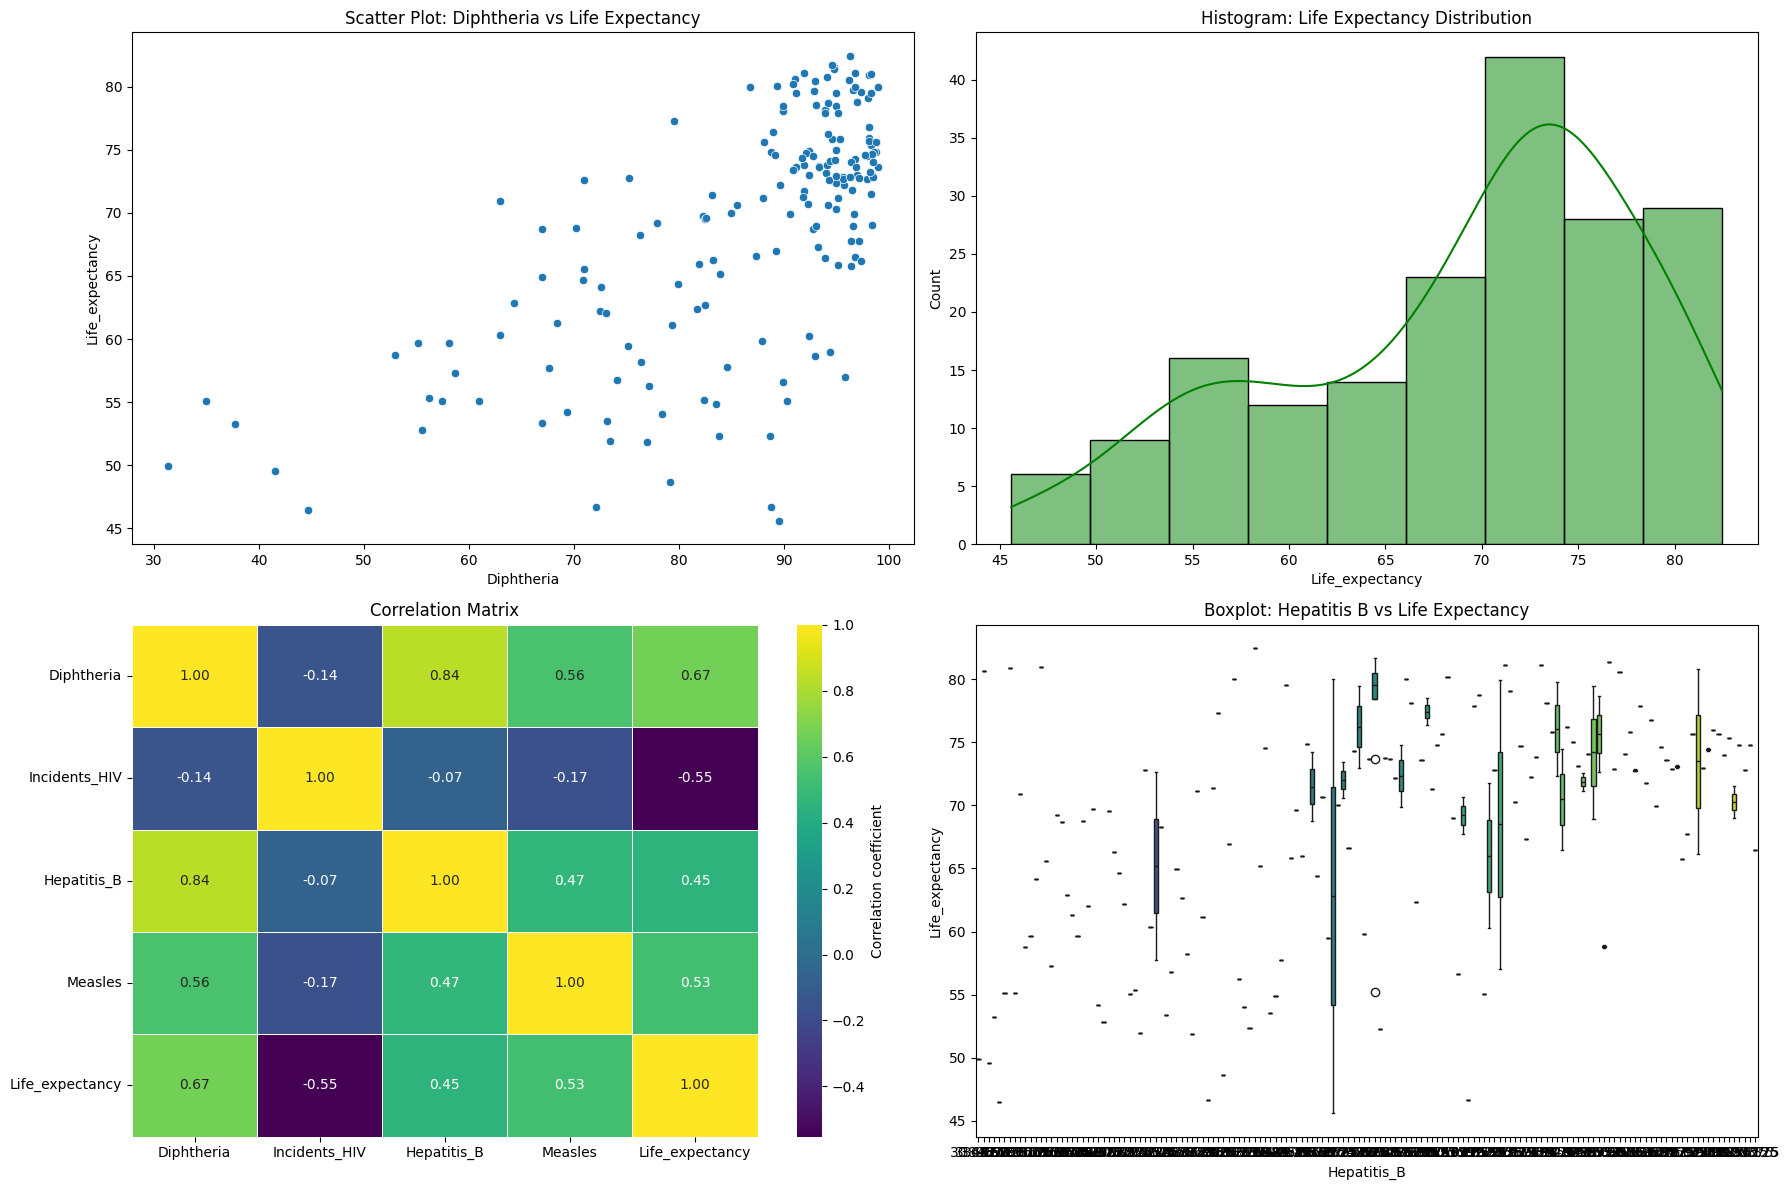


Correlation between Life Expectancy and other diseases:
Diphtheria: 0.67
Incidents_HIV: -0.55
Hepatitis_B: 0.45
Measles: 0.53


In [52]:
# 숫자형 컬럼만 선택하여 상관계수 계산
df_numeric = df['Diphtheria', 'Incidents_HIV', ]#df.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
# correlation_matrix = df_numeric.corr()

# 다양한 그래프들
plt.figure(figsize=(18, 12))

# 산점도 (Scatter plot) - 기대 수명과 Diphtheria의 관계
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['Diphtheria'], y=df['Life_expectancy'], palette='viridis')
plt.title('Scatter Plot: Diphtheria vs Life Expectancy')

# 히스토그램 (Histogram) - 기대 수명의 분포
plt.subplot(2, 2, 2)
sns.histplot(df['Life_expectancy'], kde=True, color='green', palette='viridis')
plt.title('Histogram: Life Expectancy Distribution')

# 상관 행렬 히트맵 (Correlation Heatmap)
plt.subplot(2, 2, 3)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', cbar_kws={'label': 'Correlation coefficient'}, linewidths=0.5)
plt.title('Correlation Matrix')

# 박스플롯 (Boxplot) - 기대 수명과 Hepatitis_B의 관계
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Hepatitis_B'], y=df['Life_expectancy'], palette='viridis')
plt.title('Boxplot: Hepatitis B vs Life Expectancy')

# 그래프 표시
plt.tight_layout()
plt.show()

# 기대 수명과 다른 변수 간의 상관관계 출력
print("\nCorrelation between Life Expectancy and other diseases:")
for disease in ['Diphtheria', 'Incidents_HIV', 'Hepatitis_B', 'Measles']:
    print(f'{disease}: {correlation_matrix["Life_expectancy"][disease]:.2f}')


C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\1348687145.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[column], shade=True, color='g')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\1348687145.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[column], shade=True, color='g')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\1348687145.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[column], shade=True, color='g')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19648\1348687145.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=

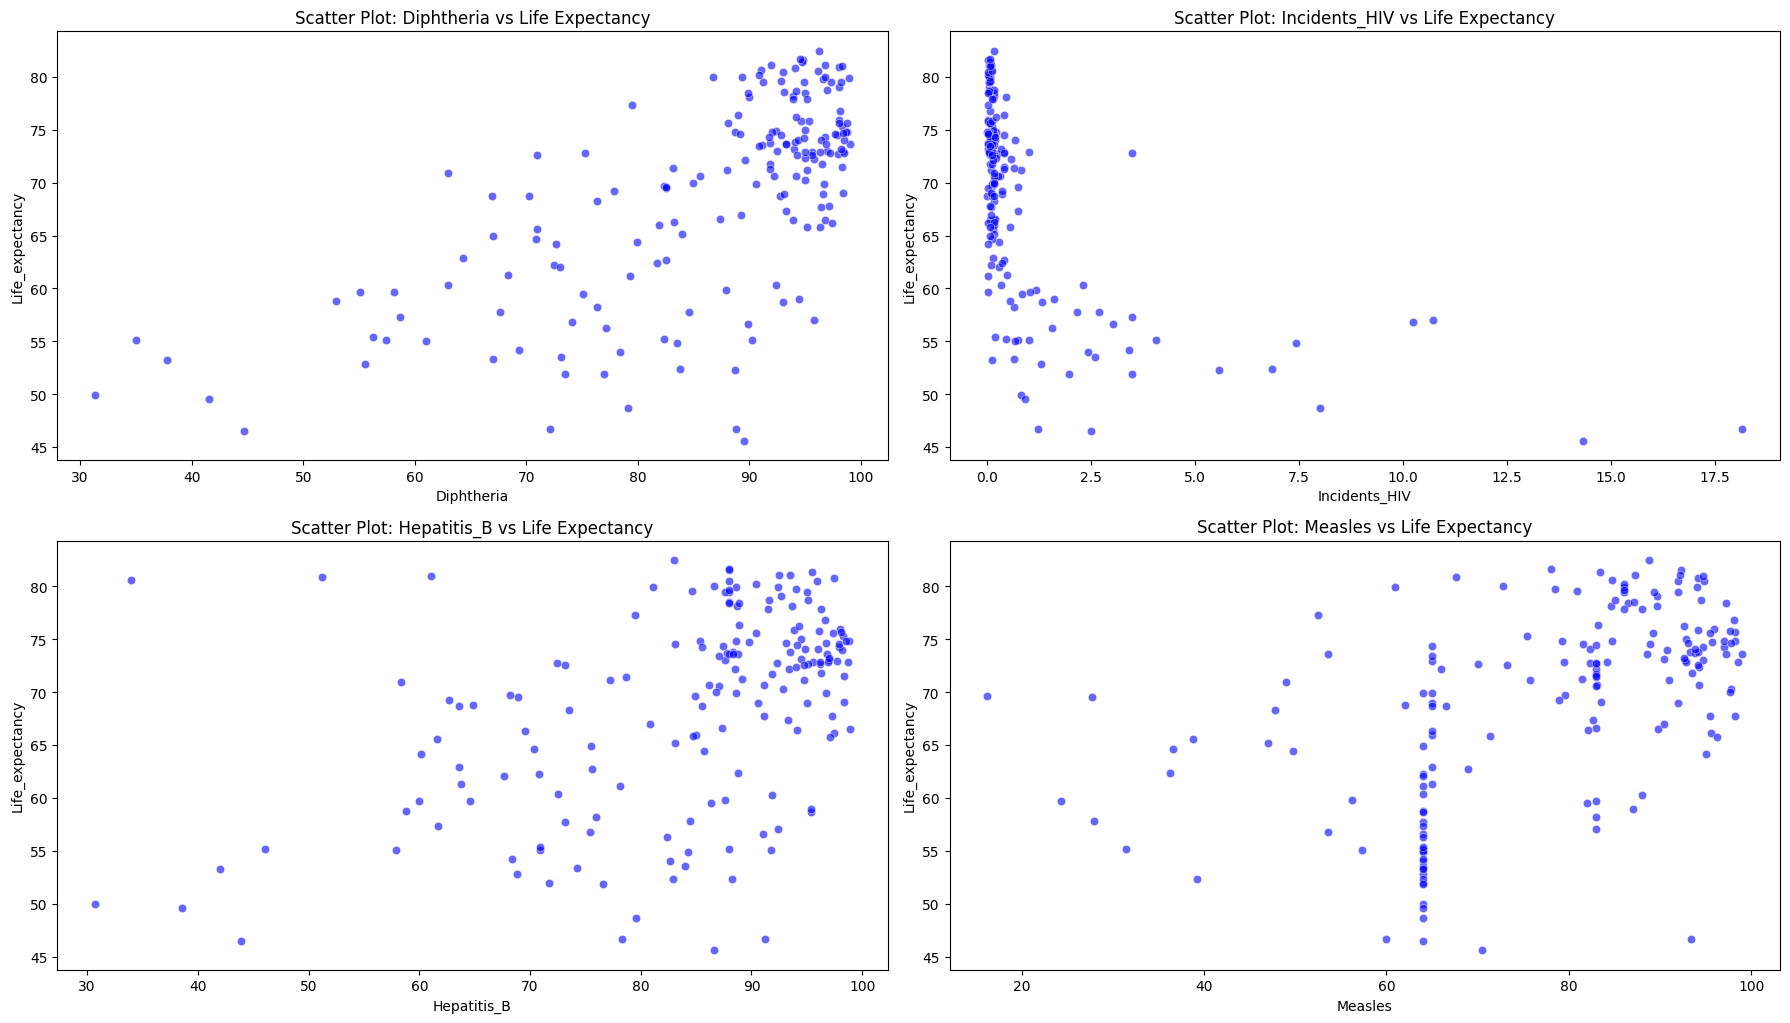

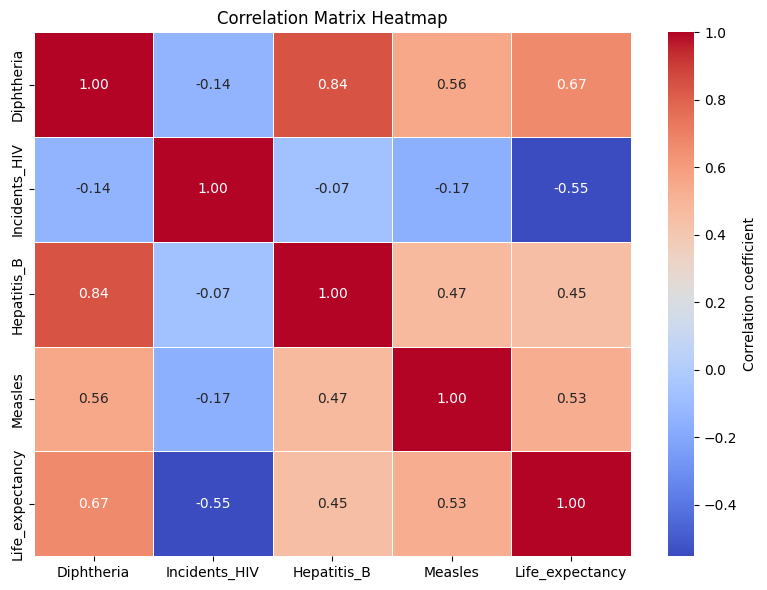

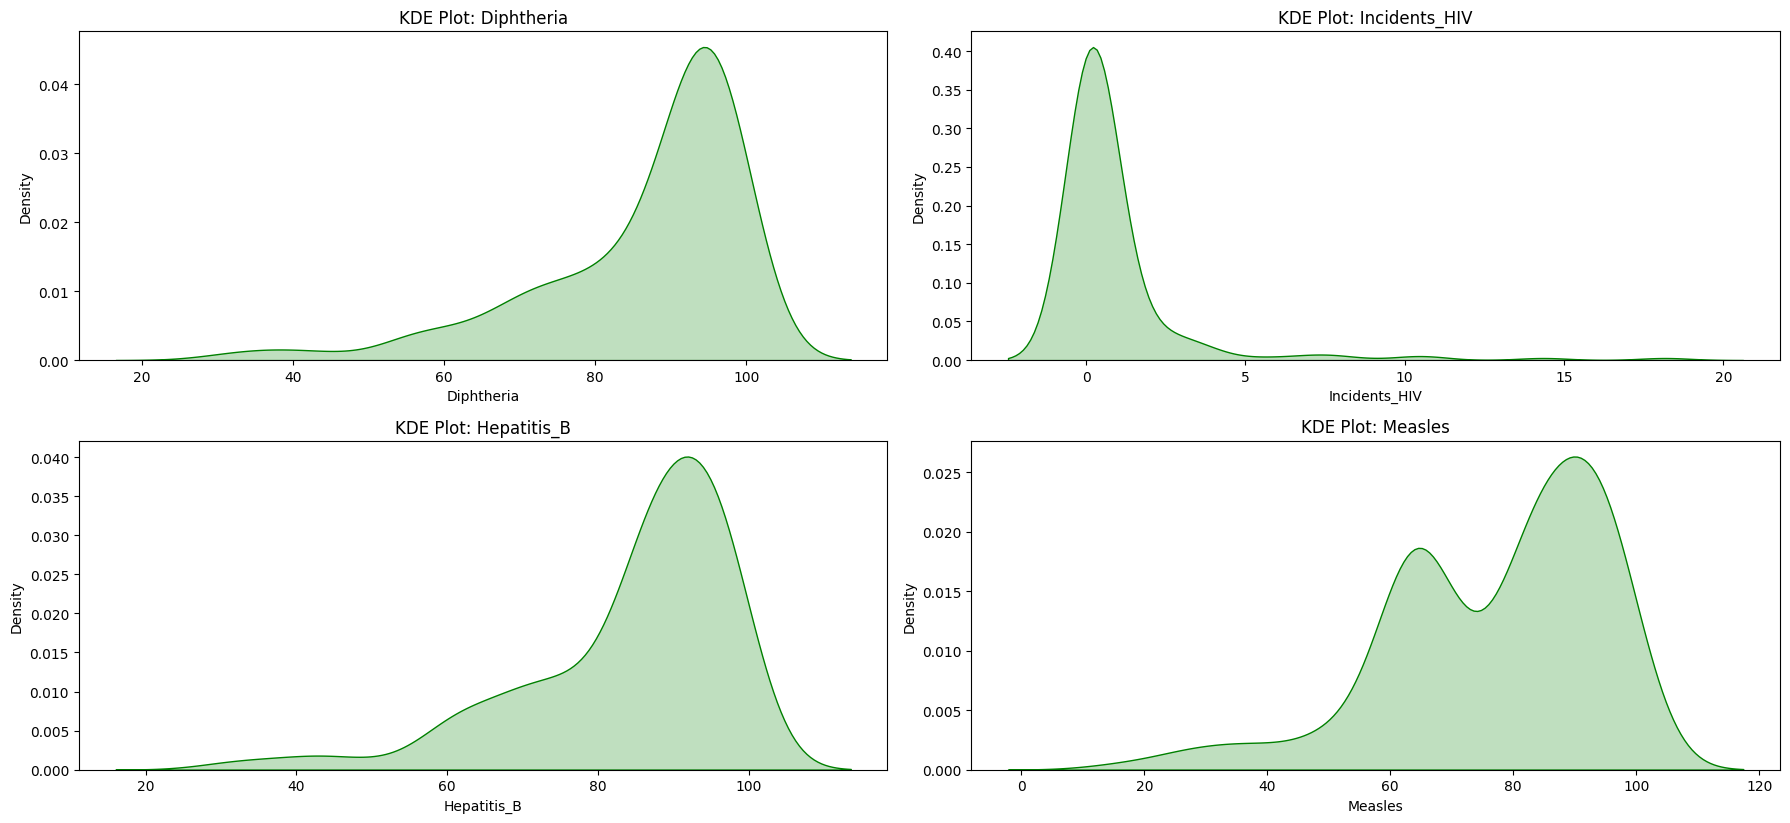

In [57]:
# 특정 변수들만 선택 (숫자형 변수들)
df_numeric = df[['Diphtheria', 'Incidents_HIV', 'Hepatitis_B', 'Measles', 'Life_expectancy']]

# 그래프 크기 설정
plt.figure(figsize=(18, 15))

# 산점도 (Scatter plot) - 기대 수명과 각 변수와의 관계
for i, column in enumerate(df_numeric.columns):
    if column != 'Life_expectancy':  # 기대 수명과 비교
        plt.subplot(3, 2, i+1)
        sns.scatterplot(x=df_numeric[column], y=df_numeric['Life_expectancy'], color='b', alpha=0.6)
        plt.title(f'Scatter Plot: {column} vs Life Expectancy')
        plt.tight_layout()

# 상관 행렬 히트맵 (Correlation Matrix Heatmap)
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation coefficient'}, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()

# 커널 밀도 추정 (KDE) 히스토그램 - 변수의 분포 확인
plt.figure(figsize=(18, 12))
for i, column in enumerate(df_numeric.columns):
    if column != 'Life_expectancy':  # 기대 수명 제외
        plt.subplot(3, 2, i+1)
        sns.kdeplot(df_numeric[column], shade=True, color='g')
        plt.title(f'KDE Plot: {column}')
        plt.tight_layout()

# 그래프 표시
plt.show()